<a href="https://colab.research.google.com/github/Manireddy69/DL/blob/main/mul_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import keras
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
len(train_data) + len(test_data)

11228

In [12]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

these in integers to know into text.....

In [15]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_newswire = ''.join([reverse_word_index.get(i, '?')for i in train_data[0]])

In [17]:
train_labels[10]

np.int64(3)

In [18]:
from typing import Sequence
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
def to_one_hot(labels , dimension= 10000):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i , label] = 1
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [22]:
#one-hot-encding using keras
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [25]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [26]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) #no of output are 46 labels

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
x_val = x_train[: 1000]
partial_x_train = x_train[1000:]


y_val = one_hot_train_labels[: 1000]
partial_y_train = one_hot_train_labels[1000: ]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train, epochs = 25,
                    batch_size= 512, validation_data=(x_val, y_val))

Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.3238 - loss: 3.2259 - val_accuracy: 0.6150 - val_loss: 1.8324
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6630 - loss: 1.6431 - val_accuracy: 0.6720 - val_loss: 1.4099
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7234 - loss: 1.2530 - val_accuracy: 0.7280 - val_loss: 1.2164
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7774 - loss: 1.0382 - val_accuracy: 0.7520 - val_loss: 1.1179
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8171 - loss: 0.8587 - val_accuracy: 0.7680 - val_loss: 1.0387
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8486 - loss: 0.6921 - val_accuracy: 0.7960 - val_loss: 0.9861
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8732 - loss: 0.6012 - val_accuracy: 0.7940 - val_loss: 0.9406
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8968 - loss: 0.4944 - val_accuracy: 0.8110 - v

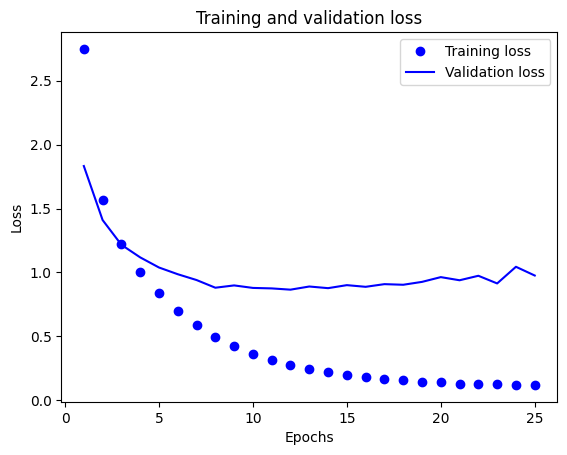

In [31]:

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

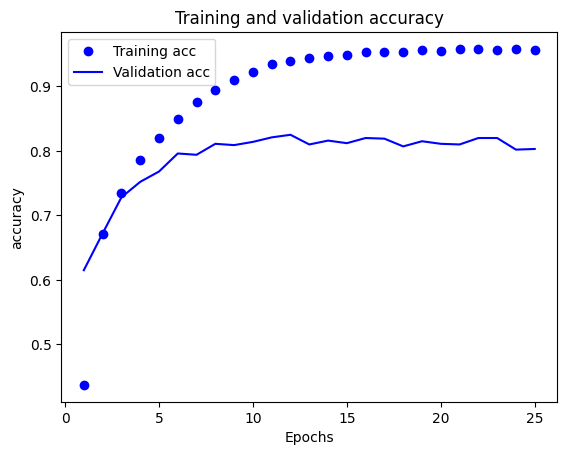

In [32]:


import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [33]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8027 - loss: 1.0790


In [34]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [36]:
predictions[0].shape

(46,)